In [ ]:
%pip install pillow numpy rosbags

   ---------------------------------------- 0.0/137.9 kB ? eta -:--:--
   ---------------------------------------- 137.9/137.9 kB 8.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/119.9 kB ? eta -:--:--
   ---------------------------------------- 119.9/119.9 kB 7.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/118.2 kB ? eta -:--:--
   ---------------------------------------- 118.2/118.2 kB 6.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
%pip install tensorrt

     ---------------------------------------- 0.0/40.5 kB ? eta -:--:--
     ---------------------------------------- 40.5/40.5 kB 1.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
DIRECTION = "rear" # "front" or "rear"

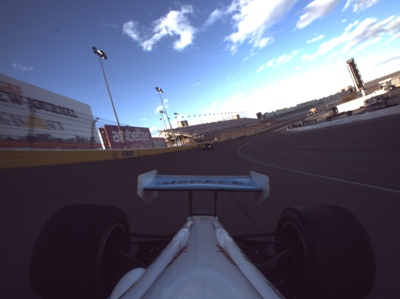

In [22]:
from rosbags.highlevel import AnyReader
from rosbags.typesys import Stores, get_typestore
from PIL import Image
import numpy as np
from pathlib import Path

typestore = get_typestore(Stores.LATEST)

def img_from_sensor_msg(msg):
    h, w, step = msg.height, msg.width, msg.step
    enc = msg.encoding.lower()
    buf = bytes(msg.data)
    assert enc == "rgb8", f"unsupported image encoding {enc}"
    arr = np.frombuffer(buf, dtype=np.uint8).reshape(h, step)[:, :3*w].reshape(h, w, 3)
    return Image.fromarray(arr, mode="RGB")

with AnyReader([Path("dpt_rosbag_lvms_2024_12\\rosbag2_2024_12_12-18_21_55_12.mcap")], default_typestore=typestore) as reader:

    connections = [c for c in reader.connections if c.topic == f"/vimba_{DIRECTION}/image"]
    for conn, ts, raw in reader.messages(connections=connections):
        msg = reader.deserialize(raw, conn.msgtype)
        img = img_from_sensor_msg(msg)
        break
preview = img.copy()
preview.thumbnail((400, 400))
preview